## 라이브러리 로딩

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [4]:
train = pd.read_csv(r"C:\Users\jk102\OneDrive - 이화여자대학교\바탕 화면\이화여자대학교\ESAA\와인품질분류\train.csv")
test = pd.read_csv(r"C:\Users\jk102\OneDrive - 이화여자대학교\바탕 화면\이화여자대학교\ESAA\와인품질분류\test.csv")

## 간단한 EDA

In [5]:
# train 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 13개 변수를 가집니다.
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [6]:
# test 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 12개 변수를 가집니다.
# train 중 quality 변수가 사라졌습니다.
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [7]:
# train 데이터의 열 별 정보를 살펴봅니다. 
# 결측치는 없습니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


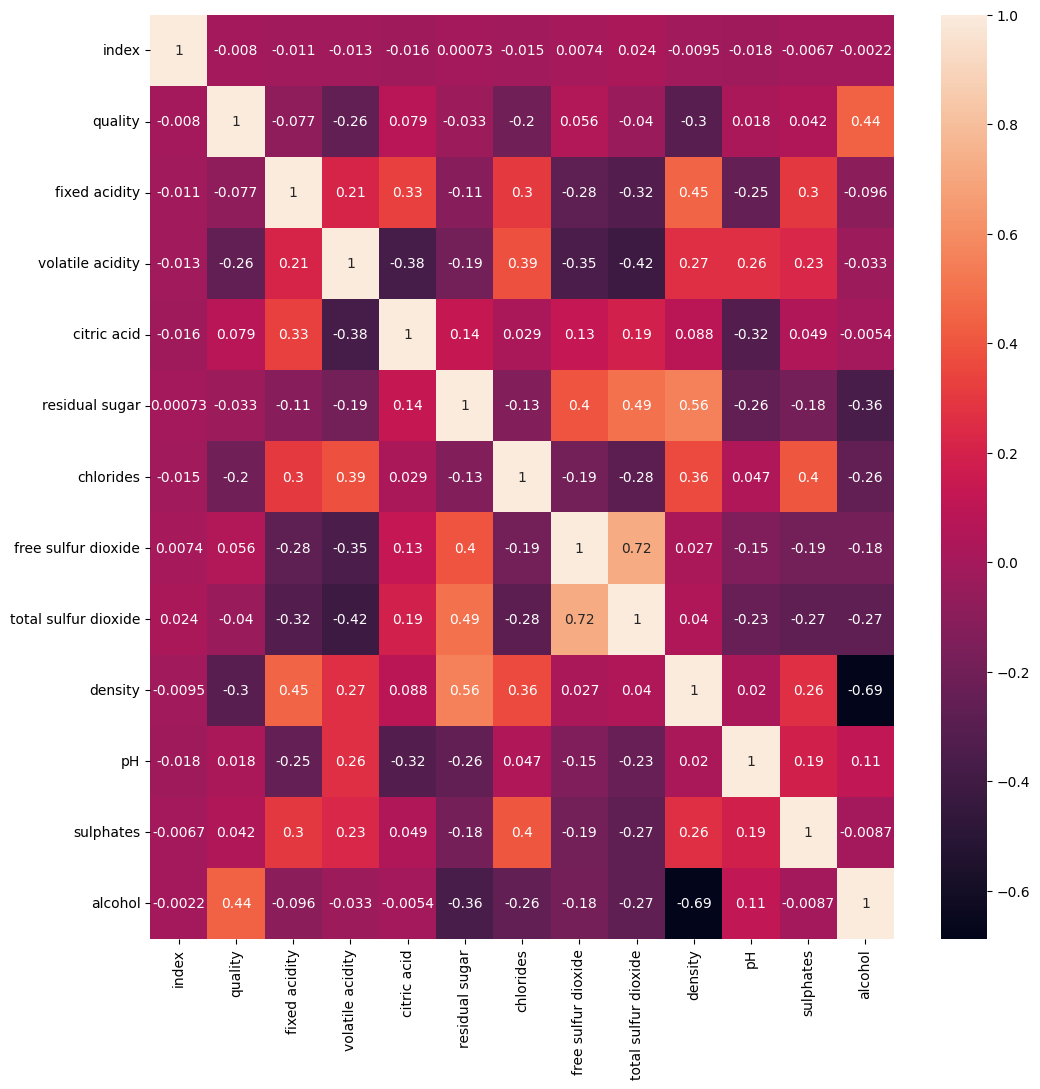

In [11]:
# train의 변수 간 상관관계를 살펴봅니다.
plt.figure(figsize=(12,12))
sns.heatmap(data = train.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

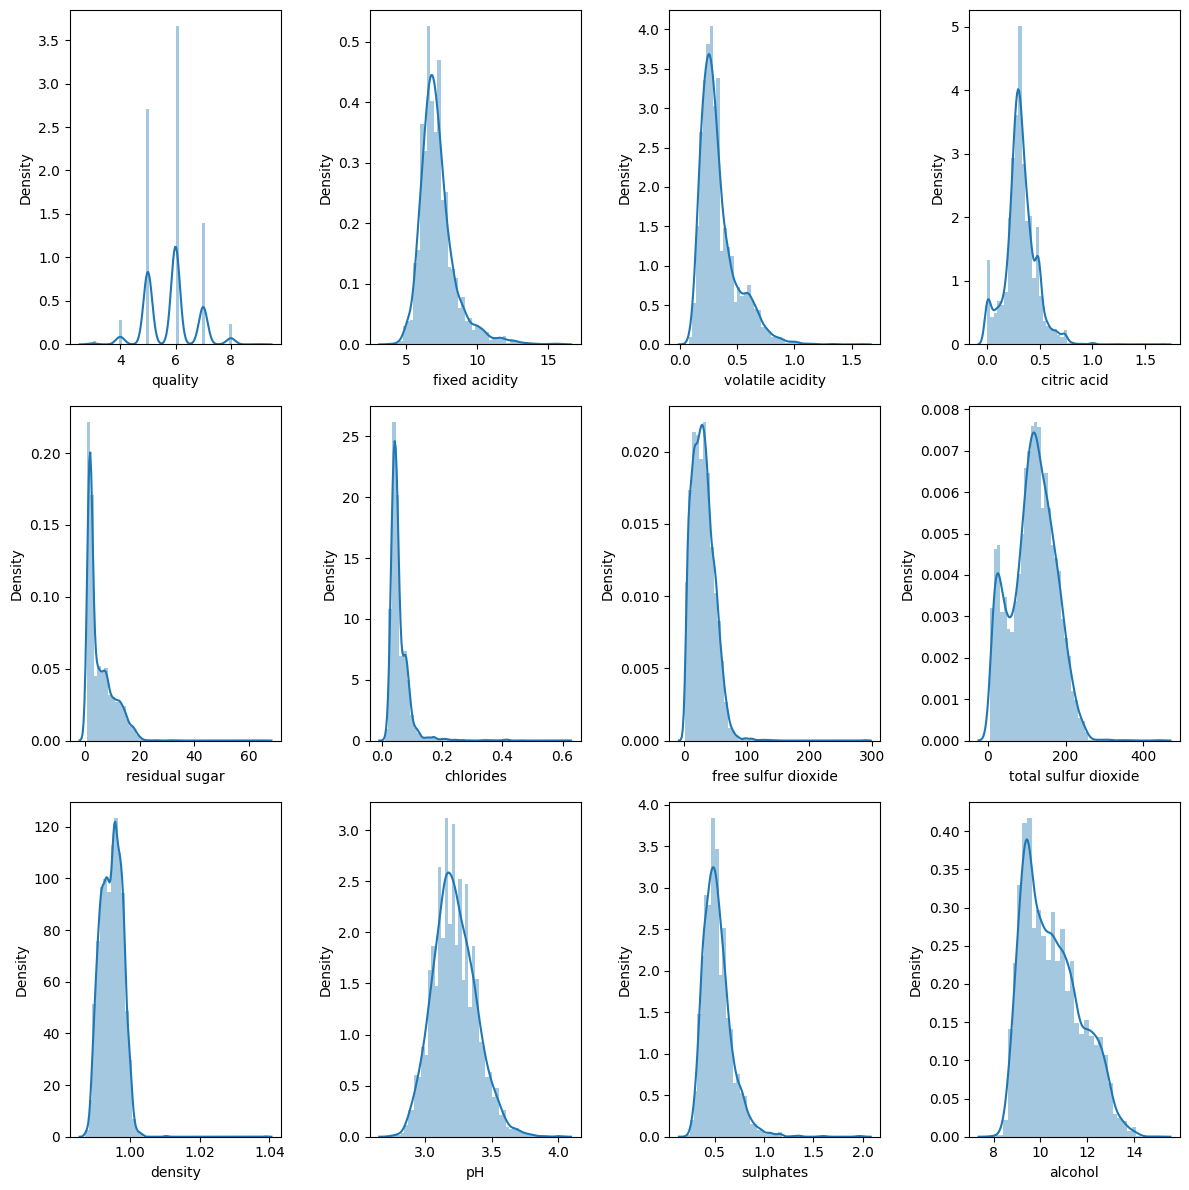

In [ ]:
# train의 각 변수별 분포를 살펴봅니다. 
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

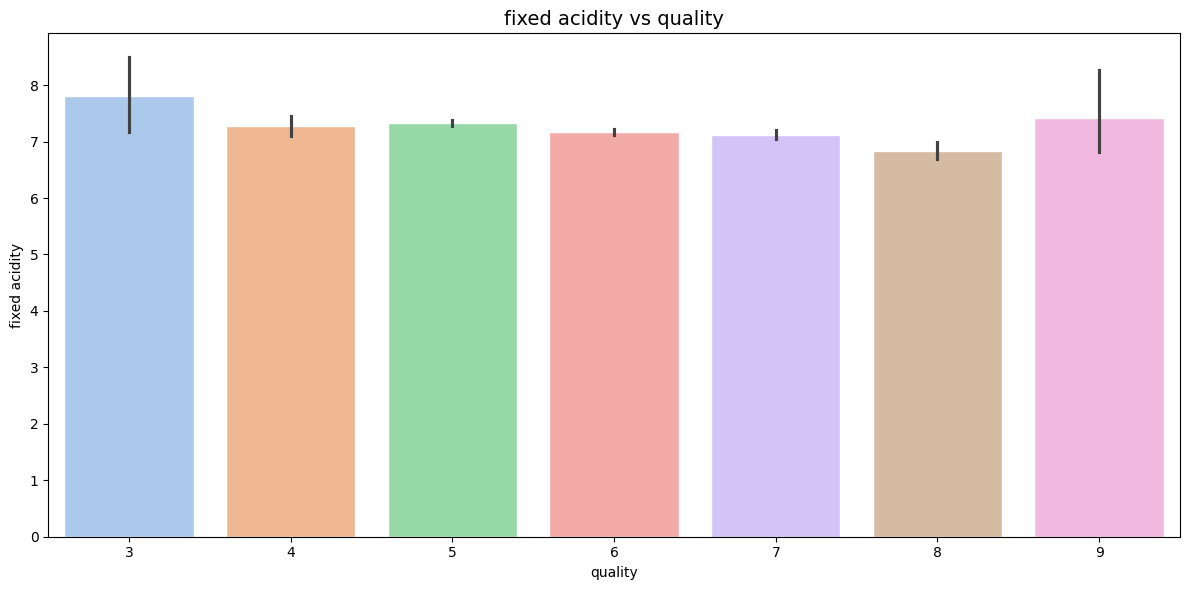

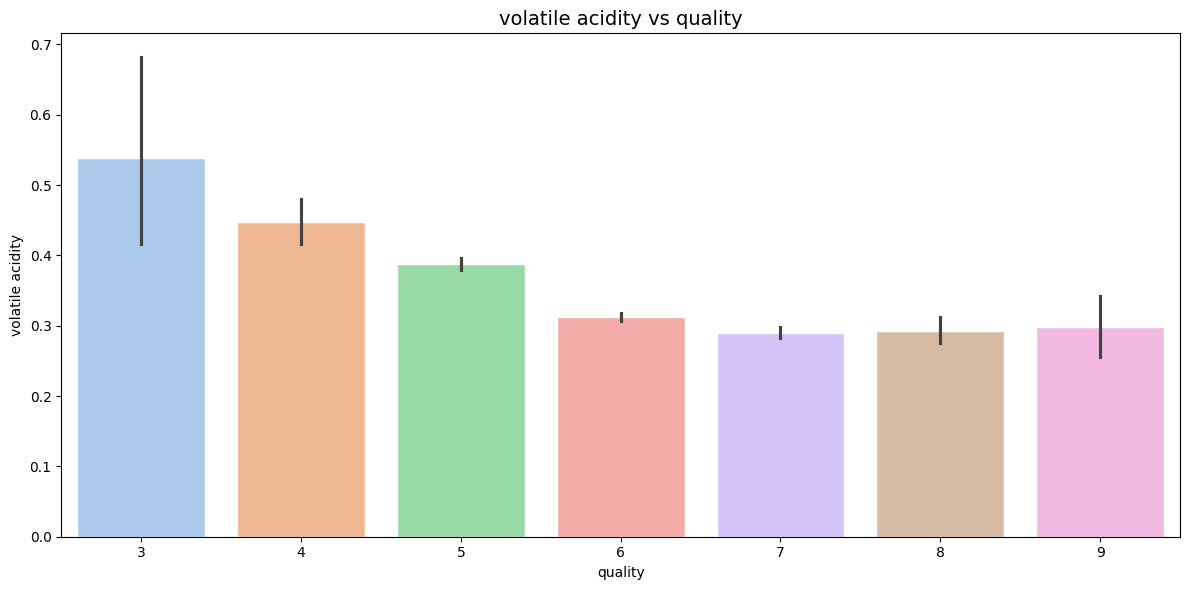

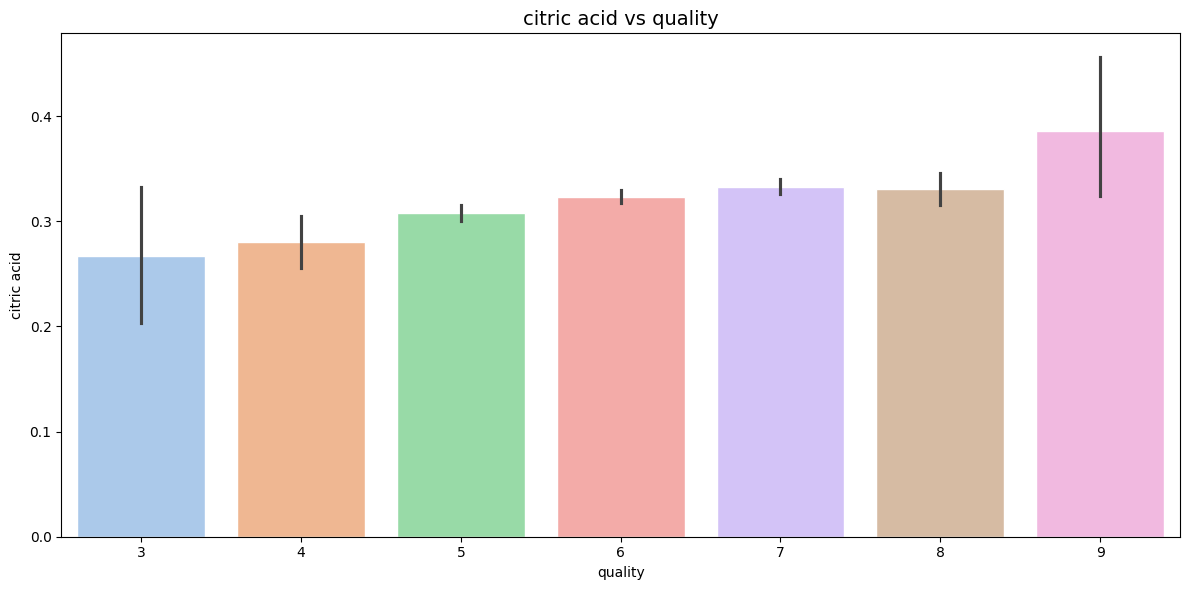

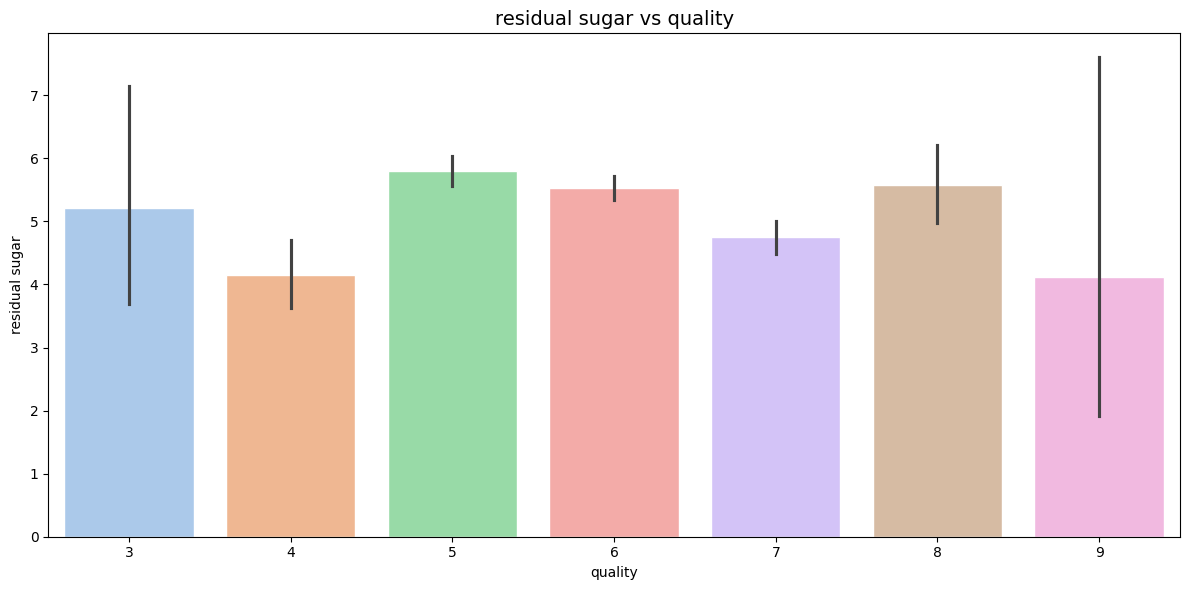

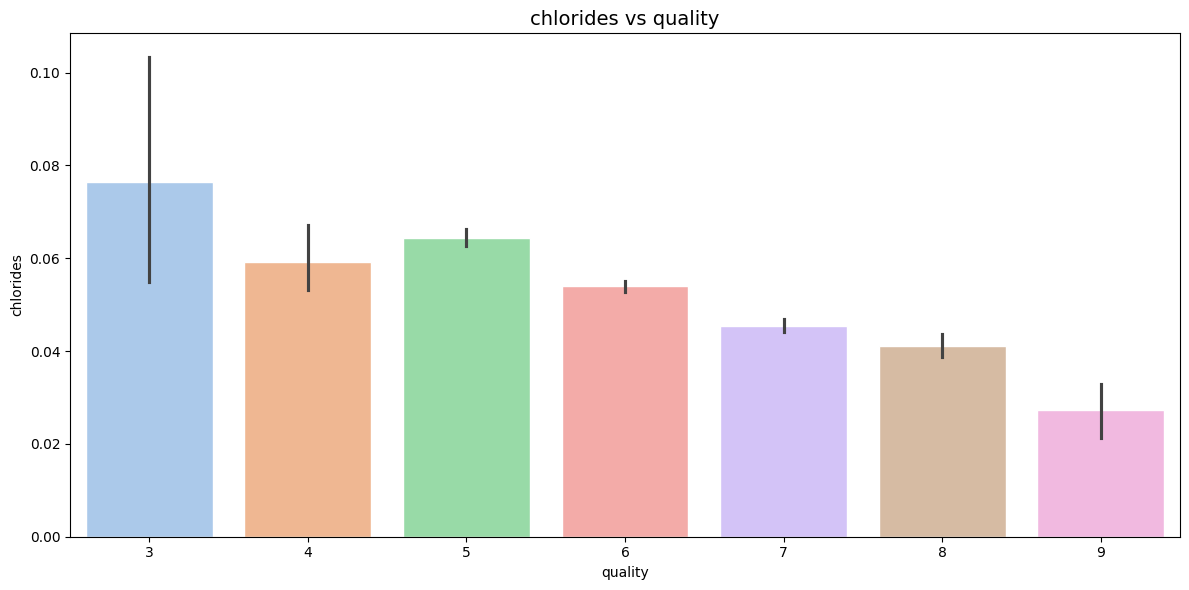

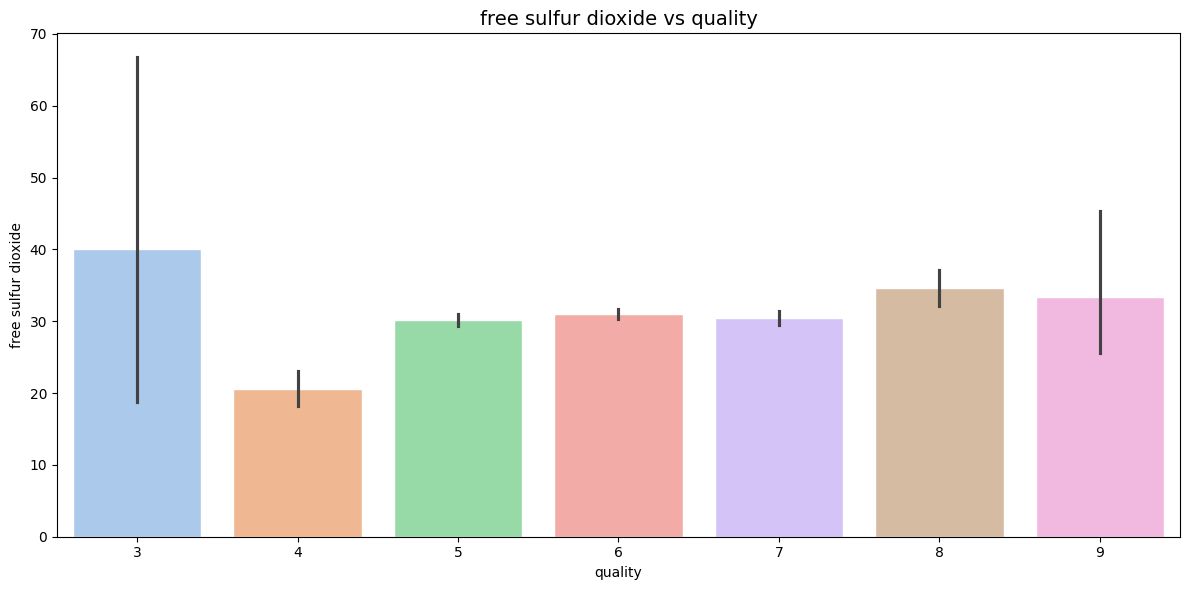

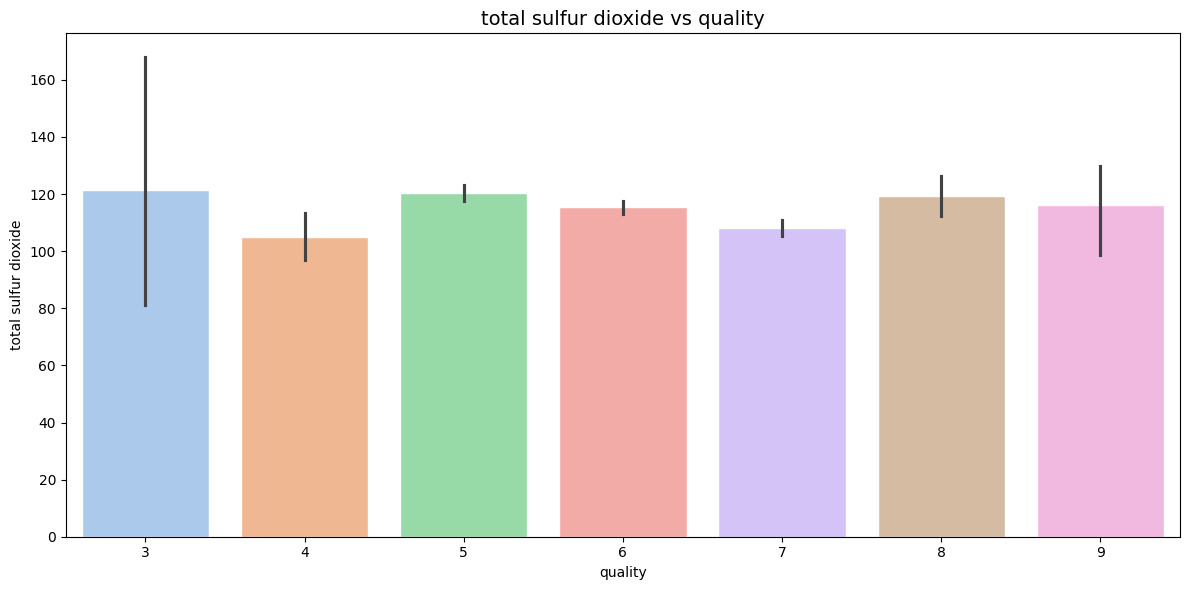

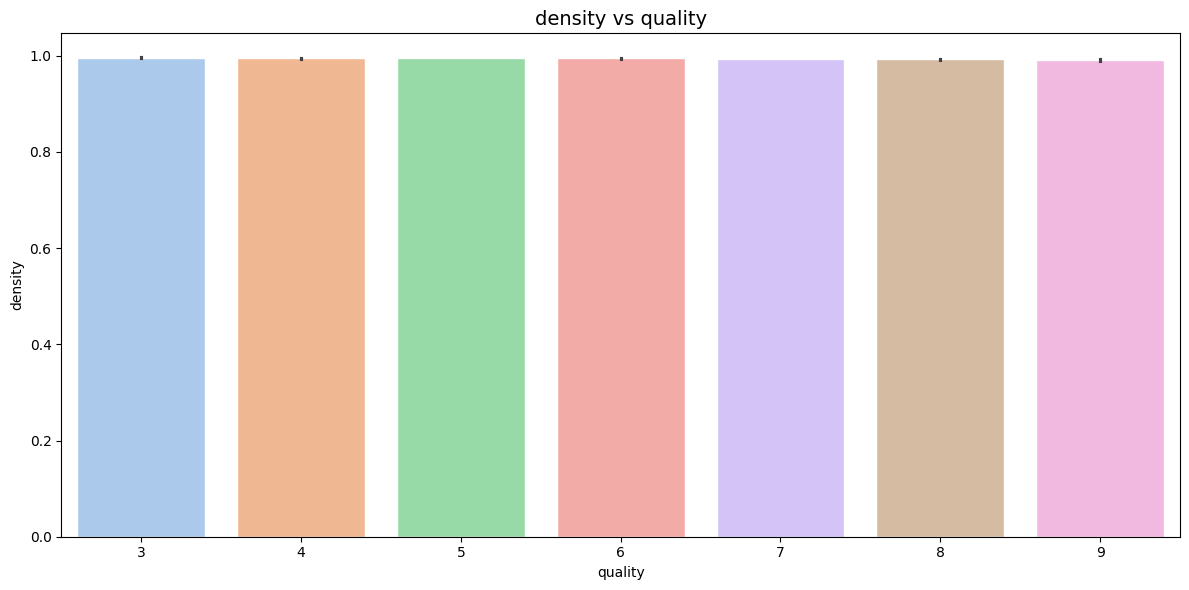

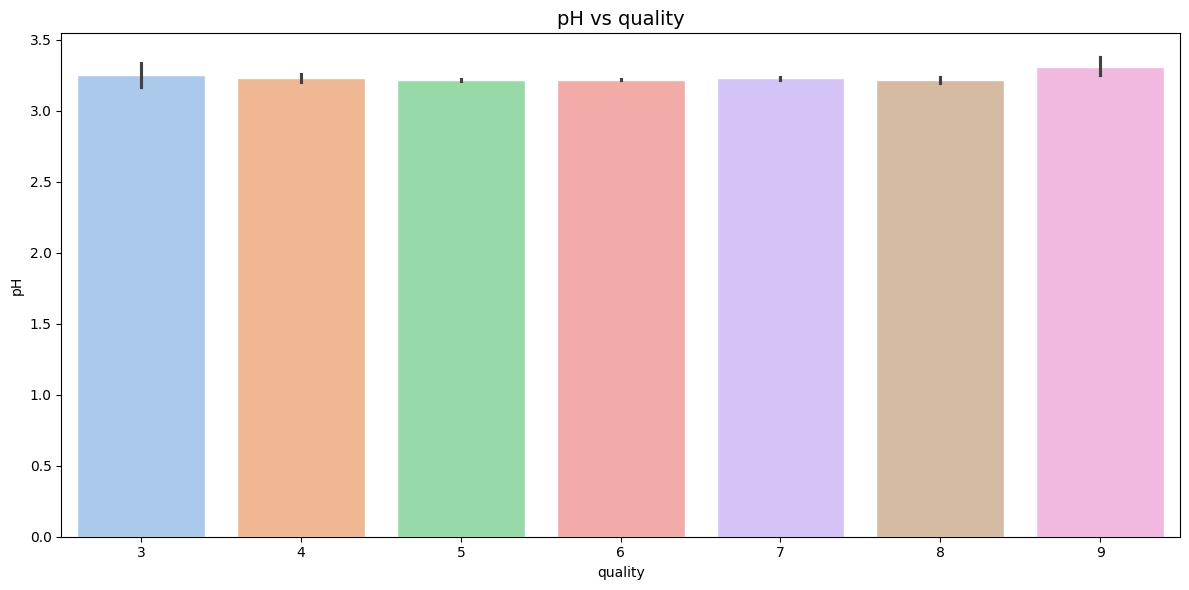

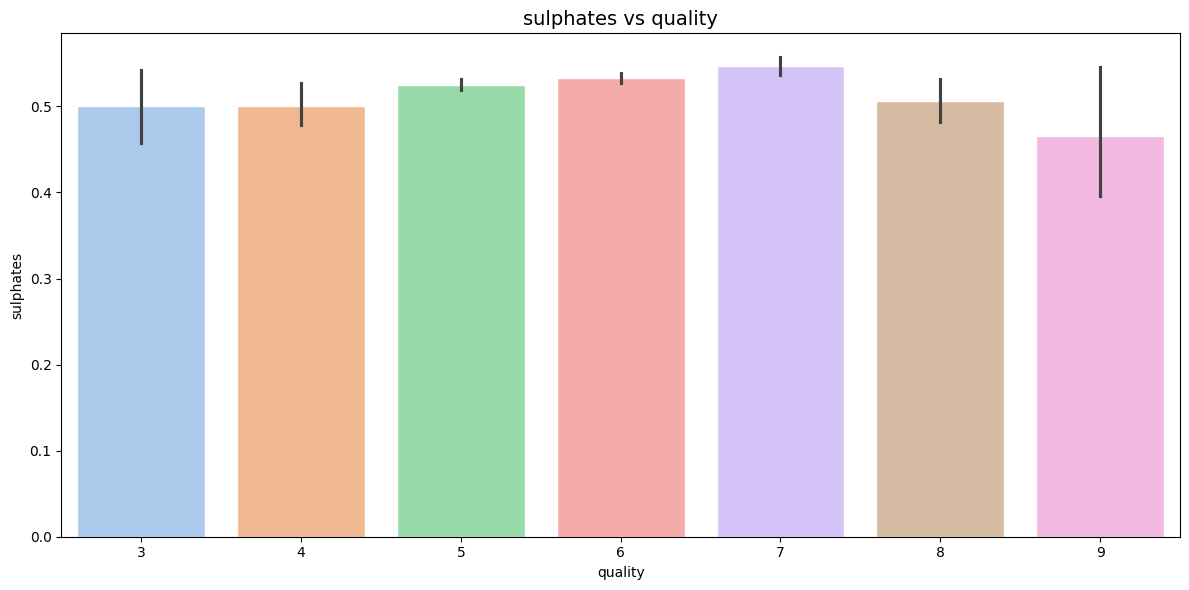

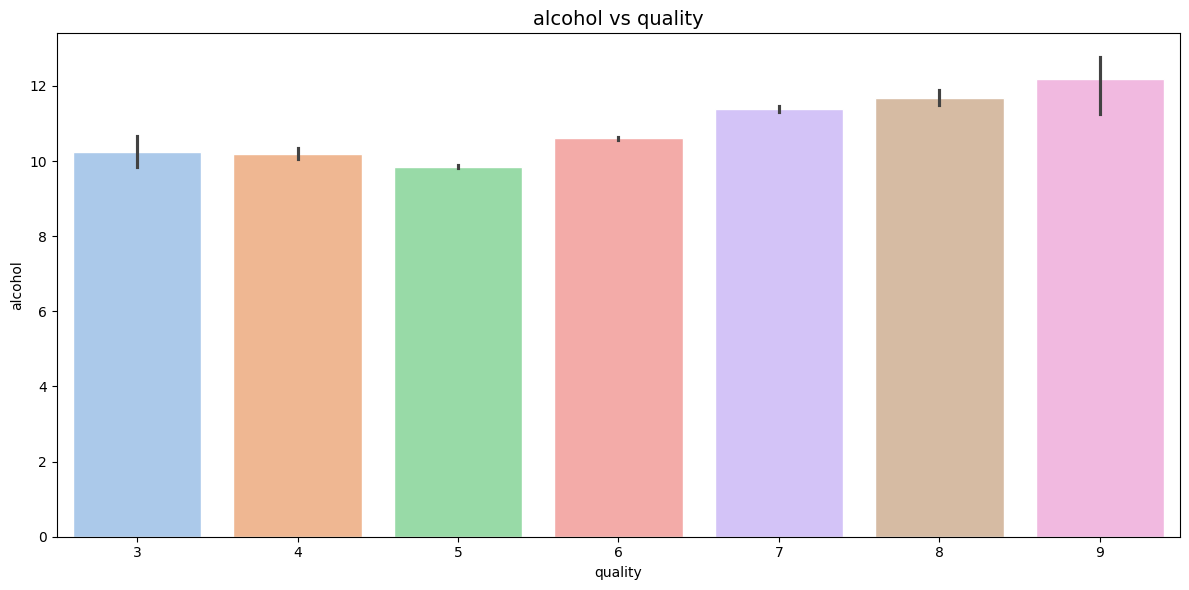

In [14]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    plt.figure(figsize=(12,6))
    sns.barplot(
        x='quality',
        y=train.columns[i+2],
        data=train,
        palette='pastel',     # seaborn 내장 파스텔톤 팔레트
        edgecolor='white'
    )
    plt.title(f"{train.columns[i+2]} vs quality", fontsize=14)
    plt.tight_layout()
    plt.show()

## Method 1(Accuary: 0.708)

### 데이터 전처리
##### 라벨 인코딩

In [ ]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [ ]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


##### 불필요한 변수 제거 및 train_x,y나누기

In [ ]:
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']

In [ ]:
test= test.drop('index', axis = 1)

In [ ]:
train_x.shape, train_y.shape, test.shape

((5497, 12), (5497,), (1000, 12))

In [ ]:
train_x.shape, train_y.shape, test.shape

((5497, 12), (5497,), (1000, 12))

##### minmaxscaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_x_mms=scaler.fit_transform(train_x)
test_mms=scaler.transform(test)

### 모델링

하이퍼 파라미터 그리드서치, 이상치 제거, 피처 추가, 피처 드롭, 오버샘플링 해보았으나 오히려 정확도 떨어짐  
보팅 모델별 가중치를 최대한 바꿔보며 정확도 높임

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

# ✅ 각 모델 정의
rf = RandomForestClassifier(
    n_estimators=500, max_depth=20, random_state=42
)

et = ExtraTreesClassifier(
    n_estimators=500, max_depth=25, random_state=42
)

cat = CatBoostClassifier(
    iterations=500, depth=8, learning_rate=0.05,
    loss_function='MultiClass', verbose=0, random_state=42
)

# ✅ 소프트 보팅
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('et', et), ('cat', cat)],
    voting='soft',
     weights=[2,2,1],
    n_jobs=-1
)

voting_clf.fit(train_x_mms,train_y)
y_pred=voting_clf.predict(test_mms)
submission=pd.read_csv('/content/drive/MyDrive/ESAA/mini_project/project2/sample_submission.csv')
submission['quality']=y_pred
submission.to_csv('mp2_voting_rfetcat_weight122.csv',index=False)


파일명이 122이나 실제론 가중치 2,2,1로 돌렸음

## Method 2(Accuracy: 0.704)

### 데이터 전처리

In [ ]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [ ]:
# 불필요한 변수 제거
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

train_x.shape, train_y.shape, test_x.shape

((5497, 12), (5497,), (1000, 12))

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 'type' 컬럼을 제외한 연속형 변수 리스트
continuous_cols = [col for col in train_x.columns if col != 'type']

# 스케일러 정의 및 연속형 변수에만 Fit/Transform 적용
scaler = MinMaxScaler()
train_x_scaled_cont = scaler.fit_transform(train_x[continuous_cols])
test_x_scaled_cont = scaler.transform(test_x[continuous_cols])

# 데이터프레임으로 변환
train_x_scaled = pd.DataFrame(train_x_scaled_cont, columns=continuous_cols, index=train_x.index)
test_x_scaled = pd.DataFrame(test_x_scaled_cont, columns=continuous_cols, index=test_x.index)

# 'type' 컬럼 (Label Encoding이 완료된 0 또는 1)을 다시 추가
train_x_scaled['type'] = train_x['type'].astype('int64')
test_x_scaled['type'] = test_x['type'].astype('int64')

# 최종적으로 CatBoost에 사용될 데이터프레임 완성

### 모델링 및 평가

In [ ]:
min_score = train['quality'].min()
print(f"\n최소 품질 점수: {min_score}")


최소 품질 점수: 3


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import time

MIN_SCORE = 3

# 2. 모든 점수에서 최소 점수(3)을 빼서 0부터 시작하는 레이블로 변환
# 예: 3 -> 0, 4 -> 1, 8 -> 5
train_y_mapped = train_y.astype('int') - MIN_SCORE

print(f"최소 품질 점수: {MIN_SCORE}")
print(f"train_y_mapped 생성 완료. (최소값: {train_y_mapped.min()}, 최대값: {train_y_mapped.max()})")

# 0부터 시작하는 레이블 (train_y_mapped) 사용
train_y_to_use = train_y_mapped
num_classes = len(train_y_to_use.unique()) # 변환된 클래스 개수 (예: 6)

# --- XGBoost 튜닝 ---
xgb_param_grid = {
    'n_estimators': [500],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05],
    'reg_lambda': [0.1, 1],
}

xgb_base = XGBClassifier(
    # ⭐ objective는 그대로 multi:softprob 사용
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=2024,
    n_jobs=-1
)

print("XGBoost 튜닝 시작...")
# ... (GridSearchCV 실행 및 best_xgb_params 저장) ...
xgb_grid_search = GridSearchCV(estimator=xgb_base, param_grid=xgb_param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
xgb_grid_search.fit(train_x_scaled, train_y_to_use)
best_xgb_params = xgb_grid_search.best_params_
print(f"XGBoost 최고 정확도: {xgb_grid_search.best_score_:.4f}")

# --- CatBoost 튜닝 ---
cat_param_grid = {
    'n_estimators': [500],
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05],
    'l2_leaf_reg': [1, 3],
}

cat_base = CatBoostClassifier(
    loss_function='MultiClass',
    # ⭐ classes_count를 0부터 시작하는 레이블 개수로 설정
    classes_count=num_classes,
    verbose=0,
    random_state=2024,
    thread_count=-1,
    cat_features=['type']
)

print("\nCatBoost 튜닝 시작...")
# ... (GridSearchCV 실행 및 best_cat_params 저장) ...
cat_grid_search = GridSearchCV(estimator=cat_base, param_grid=cat_param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
cat_grid_search.fit(train_x_scaled, train_y_to_use)
best_cat_params = cat_grid_search.best_params_
print(f"CatBoost 최고 정확도: {cat_grid_search.best_score_:.4f}")


최소 품질 점수: 3
train_y_mapped 생성 완료. (최소값: 0, 최대값: 6)
XGBoost 튜닝 시작...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
XGBoost 최고 정확도: 0.6371

CatBoost 튜닝 시작...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
CatBoost 최고 정확도: 0.6489


In [ ]:
from sklearn.ensemble import VotingClassifier
import numpy as np

# 1. 최적 파라미터로 개별 분류기 재정의 및 전체 학습
best_cat = CatBoostClassifier(
    **best_cat_params,
    loss_function='MultiClass',
    classes_count=num_classes, # 0부터 시작하는 레이블 개수 사용
    random_state=2024,
    verbose=0,
    thread_count=-1,
    cat_features=['type']
)

best_xgb = XGBClassifier(
    **best_xgb_params,
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=2024,
    n_jobs=-1
)



# 2. 최적화된 모델로 Voting Classifier 재구성
final_vote_model = VotingClassifier(
    estimators=[("cat", best_cat), ("xgb", best_xgb)],
    voting='soft',
    n_jobs=-1
)

# 3. 최종 앙상블 모델 학습 (train_y_mapped 사용)
print("\n3. 최종 Voting Classifier 학습 시작...")
final_vote_model.fit(train_x_scaled, train_y_to_use)
print("   -> 최종 앙상블 모델 학습 완료.")

# 4. 최종 예측 및 원래 점수로 복원 (제출 준비)
print("\n4. test 데이터 최종 예측 및 결과 처리...")

y_pred = final_vote_model.predict(test_x_scaled)

# 2. 🚨 예측값을 원래의 품질 점수 (3, 4, 5, ...)로 역변환합니다.
MIN_SCORE = 3
final_submission_predictions = y_pred.astype(int) + MIN_SCORE

print(f"최종 예측 품질 점수 (상위 5개): {final_submission_predictions[:5]}")


3. 최종 Voting Classifier 학습 시작...
   -> 최종 앙상블 모델 학습 완료.

4. test 데이터 최종 예측 및 결과 처리...
최종 예측 품질 점수 (상위 5개): [5 6 6 5 6]


### 제출 파일 생성

In [ ]:
y_pred = final_vote_model.predict(test_x_scaled)
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = final_submission_predictions

In [ ]:

submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [ ]:
# csv 파일로 저장합니다.
submission.to_csv('quality7.csv', index=False)

## Method 3(Accuracy: 0.702)

### 전처리

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [ ]:
from sklearn.model_selection import train_test_split

train_x = train.drop(['index', 'quality'],axis=1)
train_y = train['quality']
test_x = test.drop(['index'],axis=1)

y_encoded = train_y - train_y.min()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)

### 모델링

### RandomForest

하이퍼파라미터 최적화

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [300, 500, 700],
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_scaled, y_encoded)

print("RF Best Params:", grid_rf.best_params_)


RF Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}


In [ ]:
RF_Best_Params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**RF_Best_Params)

rf.fit(X_scaled, y_encoded)

RandomForestClassifier(n_estimators=700)

### 학습된 모델로 test 예측

In [ ]:
y_pred = rf.predict(X_test_scaled)
y_pred += 3

### 제출 파일 생성

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = y_pred

In [ ]:
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [ ]:
submission.to_csv('rf_minmax.csv', index=False)